In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from matplotlib.ticker import FormatStrFormatter
from matplotlib.transforms import BlendedGenericTransform
%matplotlib notebook

def regime():
    
    #Global Happiness Data
    
    df=pd.read_csv("C:\\Users\\14024\\Desktop\\Data.csv")
    
    df.rename(columns={'Country name':'Country'}, inplace=True)
    df.rename(columns={'year':'Year'}, inplace=True)
    df.rename(columns={'Life Ladder':'Life_Ladder'}, inplace=True)
    df1=pd.read_csv("C:\\Users\\14024\\Desktop\\Aggregate_Category_and_Subcategory_Scores_FIW_2003-2021.csv")
    
    del df1['Region']
    del df1['C/T?']
    df1 = df1[['Country/Territory', 'Edition','Status',"Total"]]
    df1.rename(columns={'Country/Territory':'Country'}, inplace=True)
    df1.rename(columns={'Edition':'Year'}, inplace=True)
    
    df1.sort_values(by=['Country','Year', 'Status'], inplace=True)
    df1 = df1.reset_index(drop=True)
    
    df3=[df, df1]
    df3=reduce(lambda left,right: pd.merge(left, right, on=["Country","Year"], how="inner"), df3)
    mapping = {'F':'Free','PF':'Partly Free','NF':'Not Free'}
    df3['Status'] = df3['Status'].map(mapping)
    
    mean_free=df3.groupby(["Country"]).agg({"Total": "mean"})
    mean_happy=df3.groupby(["Country"]).agg({"Life_Ladder": "mean"})
    mean_gdp=df3.groupby(["Country"]).agg({"Log GDP per capita": "mean"})
    mean_socsup=df3.groupby(["Country"]).agg({"Social support": "mean"})
    mean_lifex=df3.groupby(["Country"]).agg({"Healthy life expectancy at birth": "mean"})
    mean_freechoice=df3.groupby(["Country"]).agg({"Freedom to make life choices": "mean"})
    mean_generosity=df3.groupby(["Country"]).agg({"Generosity": "mean"})
    mean_corrupt=df3.groupby(["Country"]).agg({"Perceptions of corruption": "mean"})
    
    df4=[mean_happy, mean_free,mean_gdp, mean_socsup, mean_lifex,mean_freechoice, mean_generosity, mean_corrupt]
    df4=reduce(lambda left,right: pd.merge(left, right, on="Country", how="inner"), df4)
    
    criteria = [df4['Total'].between(65, 100), df4['Total'].between(29, 72), df4['Total'].between(0, 36)]
    values = ["Free", "Partly Free", "Not Free"]

    df4['Status'] = np.select(criteria, values, 0)
    df4.reset_index(level=0, inplace=True)
    #return df4.head()
# Post-Soviet Countries Only
    df5 = df3.set_index('Country', inplace=True)
    df5=df3.loc[['Uzbekistan', "Tajikistan","Kyrgyzstan","Turkmenistan","Kazakhstan",
                    "Azerbaijan", "Armenia", "Georgia",
                   "Ukraine","Belarus","Russia","Moldova",
                   "Estonia","Latvia","Lithuania"]] 
    df5.reset_index(level=0, inplace=True)
    df5.rename({'Log GDP per capita': 'Log_GDP'}, axis=1, inplace=True)
    
    df6 = df4.set_index('Country', inplace=True)
    df6=df4.loc[['Uzbekistan', "Tajikistan","Kyrgyzstan","Turkmenistan","Kazakhstan",
                    "Azerbaijan", "Armenia", "Georgia",
                   "Ukraine","Belarus","Russia","Moldova",
                   "Estonia","Latvia","Lithuania"]] 
    df6.reset_index(level=0, inplace=True)
    df6.rename({'Log GDP per capita': 'Log_GDP'}, axis=1, inplace=True)
    
    fig, (ax1) = plt.subplot(figsize=(10,6))
    fig.suptitle("Political Openness and Personal Happiness in the post-Soviet States, 2005-2020",fontsize=12)
    #sns.lineplot(x='Year', y='Life_Ladder', data=df5, ax=ax1,hue="Status",ci= None, style="Status",palette="rocket", hue_order = ['Free', 'Partly Free', 'Not Free'])
    
    p1=sns.regplot(x='Total', y='Life_Ladder',data=df4, ax=ax1, color="red")
    ax1.set(xlabel="Level of Political Freedoms", ylabel = "")
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    
    for line in range(0,df6.shape[0]):
        p1.text(df4.Total[line]+0.01, df4.Life_Ladder[line], 
     df4.Country[line], horizontalalignment='left', 
     size=9, color='black')
    
    ax1.set(xlabel="Year", ylabel = "Level of Happiness")
    ax1.legend(loc=4,frameon=False,bbox_to_anchor=(0.45,0.0,0.6,0.1), fontsize="10")
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    
    
   
    #p2=sns.regplot(x='Total', y='Life_Ladder',data=df6, ax=ax2, color="red")
    #ax2.set(xlabel="Level of Political Freedoms", ylabel = "")
    #ax2.spines["top"].set_visible(False)
    #ax2.spines["right"].set_visible(False)
    
    #for line in range(0,df6.shape[0]):
        #p2.text(df6.Total[line]+0.01, df6.Life_Ladder[line], 
     #df6.Country[line], horizontalalignment='left', 
     #size=9, color='black')
    
    plt.show();   


regime() 

<IPython.core.display.Javascript object>

AttributeError: 'AxesSubplot' object has no property 'figsize'

<IPython.core.display.Javascript object>


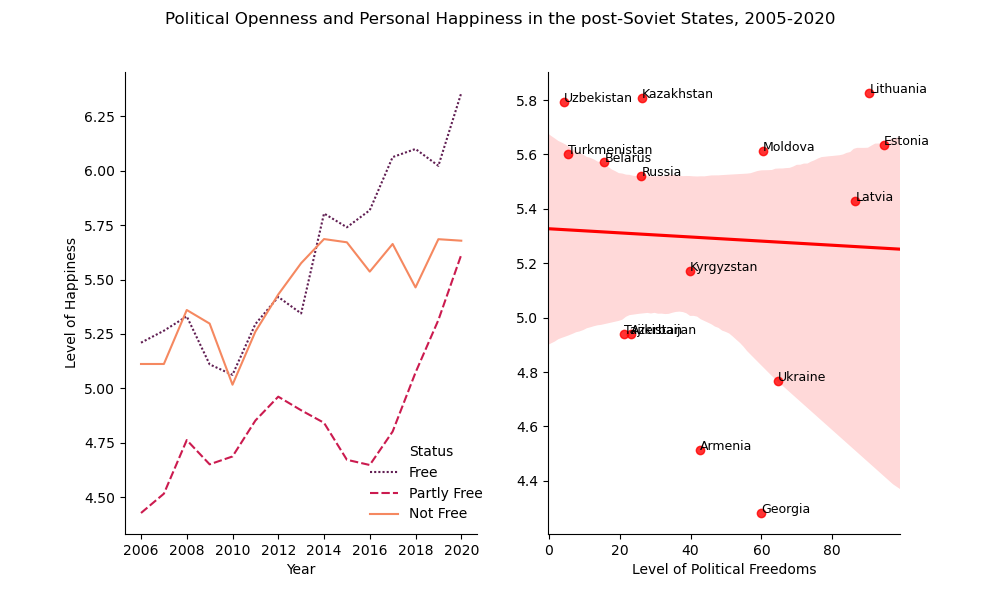